In [38]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import TimeoutException, StaleElementReferenceException
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
from selenium.webdriver.common.action_chains import ActionChains

from webdriver_manager.chrome import ChromeDriverManager
import chromedriver_autoinstaller as chromedriver
from datetime import datetime,date

from time import sleep
import re
import json
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px

#from pytrends.request import TrendReq
#from googletrans import Translator
#from aaransia import SourceLanguageError,transliterate
#from langdetect import detect, DetectorFactory
#from IPython.display import Image

import os

import twint
import nest_asyncio

After Scrapping the Yahoo snp Data we get the following dataframe

In [39]:
df = pd.read_csv("with_log_returns.csv")
df

,Month,Day,Year,Open,High,Low,Close,Adj Close,Volume,Log_Returns
0,1,2,2014,"1,845.86","1,845.86","1,827.74","1,831.98",1831.98,"3,080,600,000",0.000000
1,1,3,2014,"1,833.21","1,838.24","1,829.13","1,831.37",1831.37,"2,774,270,000",-0.000333
2,1,6,2014,"1,832.31","1,837.16","1,823.73","1,826.77",1826.77,"3,294,850,000",-0.002515
3,1,7,2014,"1,828.71","1,840.10","1,828.71","1,837.88",1837.88,"3,511,750,000",0.006063
4,1,8,2014,"1,837.90","1,840.02","1,831.40","1,837.49",1837.49,"3,652,140,000",-0.000212
...,...,...,...,...,...,...,...,...,...,...
2241,11,25,2022,"4,023.34","4,034.02","4,020.76","4,026.12",4026.12,"1,706,460,000",-0.000283
2242,11,28,2022,"4,005.36","4,012.27","3,955.77","3,963.94",3963.94,"3,615,430,000",-0.015565
2243,11,29,2022,"3,964.19","3,976.77","3,937.65","3,957.63",3957.63,"3,546,040,000",-0.001593
2244,11,30,2022,"3,957.18","4,080.11","3,938.58","4,080.11",4080.11,"6,579,360,000",0.030479


In [40]:
import numpy as np

In [41]:
df['Adj Close'] = df['Adj Close'].astype(float)
#df['Adj Close'] = df.apply(lambda row: row['Adj Close'].replace(",",""), axis=1)

In [42]:
df["Date"] = df["Year"].astype(str)+"-"+df["Month"].astype(str)+"-"+df['Day'].astype(str)

In [43]:
df

,Month,Day,Year,Open,High,Low,Close,Adj Close,Volume,Log_Returns,Date
0,1,2,2014,"1,845.86","1,845.86","1,827.74","1,831.98",1831.98,"3,080,600,000",0.000000,2014-1-2
1,1,3,2014,"1,833.21","1,838.24","1,829.13","1,831.37",1831.37,"2,774,270,000",-0.000333,2014-1-3
2,1,6,2014,"1,832.31","1,837.16","1,823.73","1,826.77",1826.77,"3,294,850,000",-0.002515,2014-1-6
3,1,7,2014,"1,828.71","1,840.10","1,828.71","1,837.88",1837.88,"3,511,750,000",0.006063,2014-1-7
4,1,8,2014,"1,837.90","1,840.02","1,831.40","1,837.49",1837.49,"3,652,140,000",-0.000212,2014-1-8
...,...,...,...,...,...,...,...,...,...,...,...
2241,11,25,2022,"4,023.34","4,034.02","4,020.76","4,026.12",4026.12,"1,706,460,000",-0.000283,2022-11-25
2242,11,28,2022,"4,005.36","4,012.27","3,955.77","3,963.94",3963.94,"3,615,430,000",-0.015565,2022-11-28
2243,11,29,2022,"3,964.19","3,976.77","3,937.65","3,957.63",3957.63,"3,546,040,000",-0.001593,2022-11-29
2244,11,30,2022,"3,957.18","4,080.11","3,938.58","4,080.11",4080.11,"6,579,360,000",0.030479,2022-11-30


In [44]:
datess = []
for dat in df["Date"].tolist():
    datess.append(datetime.strptime(dat, '%Y-%m-%d'))
df["Daten"] = datess
df

,Month,Day,Year,Open,High,Low,Close,Adj Close,Volume,Log_Returns,Date,Daten
0,1,2,2014,"1,845.86","1,845.86","1,827.74","1,831.98",1831.98,"3,080,600,000",0.000000,2014-1-2,2014-01-02
1,1,3,2014,"1,833.21","1,838.24","1,829.13","1,831.37",1831.37,"2,774,270,000",-0.000333,2014-1-3,2014-01-03
2,1,6,2014,"1,832.31","1,837.16","1,823.73","1,826.77",1826.77,"3,294,850,000",-0.002515,2014-1-6,2014-01-06
3,1,7,2014,"1,828.71","1,840.10","1,828.71","1,837.88",1837.88,"3,511,750,000",0.006063,2014-1-7,2014-01-07
4,1,8,2014,"1,837.90","1,840.02","1,831.40","1,837.49",1837.49,"3,652,140,000",-0.000212,2014-1-8,2014-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...
2241,11,25,2022,"4,023.34","4,034.02","4,020.76","4,026.12",4026.12,"1,706,460,000",-0.000283,2022-11-25,2022-11-25
2242,11,28,2022,"4,005.36","4,012.27","3,955.77","3,963.94",3963.94,"3,615,430,000",-0.015565,2022-11-28,2022-11-28
2243,11,29,2022,"3,964.19","3,976.77","3,937.65","3,957.63",3957.63,"3,546,040,000",-0.001593,2022-11-29,2022-11-29
2244,11,30,2022,"3,957.18","4,080.11","3,938.58","4,080.11",4080.11,"6,579,360,000",0.030479,2022-11-30,2022-11-30


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2246 entries, 0 to 2245
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        2246 non-null   int64         
 1   Day          2246 non-null   int64         
 2   Year         2246 non-null   int64         
 3   Open         2246 non-null   object        
 4   High         2246 non-null   object        
 5   Low          2246 non-null   object        
 6   Close        2246 non-null   object        
 7   Adj Close    2246 non-null   float64       
 8   Volume       2246 non-null   object        
 9   Log_Returns  2246 non-null   float64       
 10  Date         2246 non-null   object        
 11  Daten        2246 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 210.7+ KB


In [46]:
df1 =pd.read_csv("news_sent.csv")

In [47]:
df1

,articles,date,Positive,Negative,Neutral
0,STOCKS\nChina Stocks Pull Asia Lower\nThe Shan...,2015-09-13,0.009930,0.945908,0.044162
1,U.S. MARKETS\nStocks End Week on High Note\nSh...,2015-09-13,0.188544,0.160164,0.651292
2,MONEYBEAT BLOG\nDon’t Expect New Stock-Market ...,2015-09-13,0.050573,0.294797,0.654630
3,MONEYBEAT BLOG\nTrain Reading: Day One of FOMC...,2015-09-13,0.029001,0.034227,0.936771
4,MONEYBEAT BLOG\nMorning MoneyBeat Asia: The Gr...,2015-09-13,0.094707,0.040573,0.864719
...,...,...,...,...,...
195775,"STOCKS\nSimon Property Group, Kraft Heinz, Uni...",2020-05-01,0.023479,0.045710,0.930811
195776,WHATS NEWS BUSINESS FINANCE\nWhat’s News: Busi...,2020-05-01,0.025034,0.042853,0.932114
195777,"ECONOMY\nAs Restrictions Ease, Economic Reboun...",2020-05-01,0.034225,0.576723,0.389052
195778,SHIPPING MATTERS\nCoronavirus Slows but Won’t ...,2020-05-01,0.038385,0.066323,0.895292


In [48]:
df1["Sentiment"] = df1['Positive']-df1['Negative']

In [49]:
def pos_or_neg(row) :
    if row["Sentiment"]< 0 :
        return (-1)
    elif row["Sentiment"]> 0:
        return 1
    else :
        return 0

In [50]:
def encode(row) :
  if row["Sent"] < 0 :
    return -1
  elif row["Sent"] >0 :
    return 1
  elif row["Sent"] == 0 :
    return 0

In [51]:
df1['Sent'] = df1.apply(lambda row: pos_or_neg(row), axis=1)

In [52]:
df_by_date = df1[["date","Sent"]].groupby(by = ["date"]).sum()

In [53]:
df_by_date["Sent_enc"] = df_by_date.apply(lambda row: encode(row), axis=1)
df_by_date

,Sent,Sent_enc
date,,
2014-01-01,-16,-1
2014-01-02,1,1
2014-01-03,-4,-1
2014-01-04,-3,-1
2014-01-05,6,1
...,...,...
2022-11-27,-9,-1
2022-11-28,-5,-1
2022-11-29,-1,-1


In [54]:
df_by_date.to_csv("bydate.csv")
df_by_date = pd.read_csv("bydate.csv")

In [55]:
datess_ = []
for dat in df_by_date["date"].tolist():
    datess_.append(datetime.strptime(dat, '%Y-%m-%d'))
df_by_date["Daten"] = datess_
df_by_date

,date,Sent,Sent_enc,Daten
0,2014-01-01,-16,-1,2014-01-01
1,2014-01-02,1,1,2014-01-02
2,2014-01-03,-4,-1,2014-01-03
3,2014-01-04,-3,-1,2014-01-04
4,2014-01-05,6,1,2014-01-05
...,...,...,...,...
2997,2022-11-27,-9,-1,2022-11-27
2998,2022-11-28,-5,-1,2022-11-28
2999,2022-11-29,-1,-1,2022-11-29
3000,2022-11-30,-1,-1,2022-11-30


In [56]:
merged_dataframe = pd.merge_asof(df, df_by_date, on="Daten",by="Daten")

In [57]:
merged_dataframe["Sent_enc"].value_counts()

-1.0    1212
 1.0     736
 0.0     117
Name: Sent_enc, dtype: int64

In [58]:
merged_dataframe

,Month,Day,Year,Open,High,Low,Close,Adj Close,Volume,Log_Returns,Date,Daten,date,Sent,Sent_enc
0,1,2,2014,"1,845.86","1,845.86","1,827.74","1,831.98",1831.98,"3,080,600,000",0.000000,2014-1-2,2014-01-02,2014-01-02,1.0,1.0
1,1,3,2014,"1,833.21","1,838.24","1,829.13","1,831.37",1831.37,"2,774,270,000",-0.000333,2014-1-3,2014-01-03,2014-01-03,-4.0,-1.0
2,1,6,2014,"1,832.31","1,837.16","1,823.73","1,826.77",1826.77,"3,294,850,000",-0.002515,2014-1-6,2014-01-06,2014-01-06,-12.0,-1.0
3,1,7,2014,"1,828.71","1,840.10","1,828.71","1,837.88",1837.88,"3,511,750,000",0.006063,2014-1-7,2014-01-07,2014-01-07,11.0,1.0
4,1,8,2014,"1,837.90","1,840.02","1,831.40","1,837.49",1837.49,"3,652,140,000",-0.000212,2014-1-8,2014-01-08,2014-01-08,-11.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,11,25,2022,"4,023.34","4,034.02","4,020.76","4,026.12",4026.12,"1,706,460,000",-0.000283,2022-11-25,2022-11-25,2022-11-25,-2.0,-1.0
2242,11,28,2022,"4,005.36","4,012.27","3,955.77","3,963.94",3963.94,"3,615,430,000",-0.015565,2022-11-28,2022-11-28,2022-11-28,-5.0,-1.0
2243,11,29,2022,"3,964.19","3,976.77","3,937.65","3,957.63",3957.63,"3,546,040,000",-0.001593,2022-11-29,2022-11-29,2022-11-29,-1.0,-1.0
2244,11,30,2022,"3,957.18","4,080.11","3,938.58","4,080.11",4080.11,"6,579,360,000",0.030479,2022-11-30,2022-11-30,2022-11-30,-1.0,-1.0


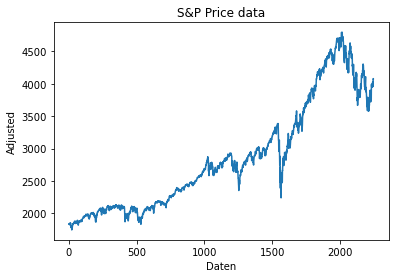

In [59]:
merged_dataframe['Adj Close'].plot()
plt.xlabel("Daten")
plt.ylabel("Adjusted")
plt.title("S&P Price data")
plt.show()

In [60]:
snp_daily_returns = merged_dataframe['Adj Close'].pct_change()
#snp_monthly_returns = merged_dataframe['Adj Close'].resample('M').ffill().pct_change()

In [61]:
merged_dataframe["Daily Returns"] = snp_daily_returns

In [62]:
merged_dataframe["Daily Returns"] = merged_dataframe["Daily Returns"].fillna(0)

In [63]:
merged_dataframe

,Month,Day,Year,Open,High,Low,Close,Adj Close,Volume,Log_Returns,Date,Daten,date,Sent,Sent_enc,Daily Returns
0,1,2,2014,"1,845.86","1,845.86","1,827.74","1,831.98",1831.98,"3,080,600,000",0.000000,2014-1-2,2014-01-02,2014-01-02,1.0,1.0,0.000000
1,1,3,2014,"1,833.21","1,838.24","1,829.13","1,831.37",1831.37,"2,774,270,000",-0.000333,2014-1-3,2014-01-03,2014-01-03,-4.0,-1.0,-0.000333
2,1,6,2014,"1,832.31","1,837.16","1,823.73","1,826.77",1826.77,"3,294,850,000",-0.002515,2014-1-6,2014-01-06,2014-01-06,-12.0,-1.0,-0.002512
3,1,7,2014,"1,828.71","1,840.10","1,828.71","1,837.88",1837.88,"3,511,750,000",0.006063,2014-1-7,2014-01-07,2014-01-07,11.0,1.0,0.006082
4,1,8,2014,"1,837.90","1,840.02","1,831.40","1,837.49",1837.49,"3,652,140,000",-0.000212,2014-1-8,2014-01-08,2014-01-08,-11.0,-1.0,-0.000212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,11,25,2022,"4,023.34","4,034.02","4,020.76","4,026.12",4026.12,"1,706,460,000",-0.000283,2022-11-25,2022-11-25,2022-11-25,-2.0,-1.0,-0.000283
2242,11,28,2022,"4,005.36","4,012.27","3,955.77","3,963.94",3963.94,"3,615,430,000",-0.015565,2022-11-28,2022-11-28,2022-11-28,-5.0,-1.0,-0.015444
2243,11,29,2022,"3,964.19","3,976.77","3,937.65","3,957.63",3957.63,"3,546,040,000",-0.001593,2022-11-29,2022-11-29,2022-11-29,-1.0,-1.0,-0.001592
2244,11,30,2022,"3,957.18","4,080.11","3,938.58","4,080.11",4080.11,"6,579,360,000",0.030479,2022-11-30,2022-11-30,2022-11-30,-1.0,-1.0,0.030948


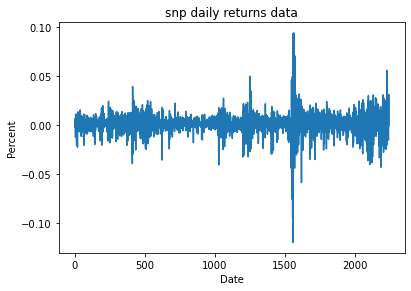

In [64]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(snp_daily_returns)
ax1.set_xlabel("Date")
ax1.set_ylabel("Percent")
ax1.set_title("snp daily returns data")
plt.show()

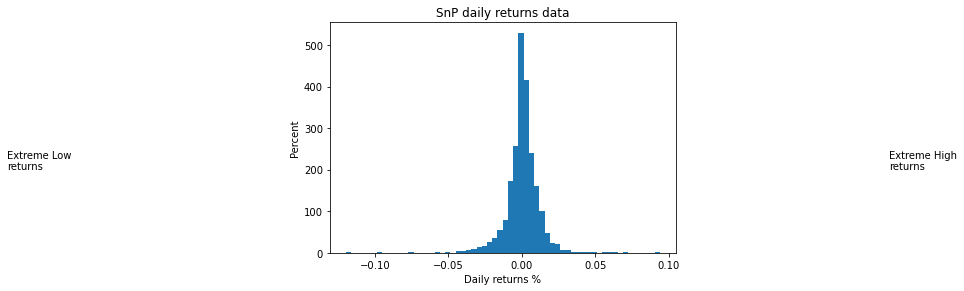

In [65]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
snp_daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("SnP daily returns data")
ax1.text(-0.35,200,"Extreme Low\nreturns")
ax1.text(0.25,200,"Extreme High\nreturns")
plt.show()

In [66]:
snp_cum_returns = (snp_daily_returns + 1).cumprod()

In [67]:
snp_cum_returns

0            NaN
1       0.999667
2       0.997156
3       1.003221
4       1.003008
          ...   
2241    2.197688
2242    2.163746
2243    2.160302
2244    2.227159
2245    2.225226
Name: Adj Close, Length: 2246, dtype: float64

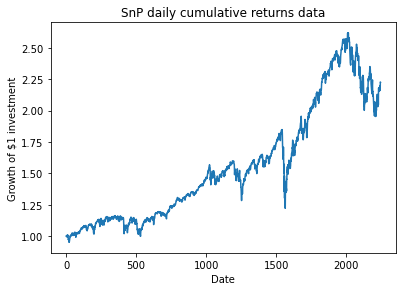

In [68]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
snp_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("SnP daily cumulative returns data")
plt.show()

# Strategy no 1

In [69]:
merged_dataframe

,Month,Day,Year,Open,High,Low,Close,Adj Close,Volume,Log_Returns,Date,Daten,date,Sent,Sent_enc,Daily Returns
0,1,2,2014,"1,845.86","1,845.86","1,827.74","1,831.98",1831.98,"3,080,600,000",0.000000,2014-1-2,2014-01-02,2014-01-02,1.0,1.0,0.000000
1,1,3,2014,"1,833.21","1,838.24","1,829.13","1,831.37",1831.37,"2,774,270,000",-0.000333,2014-1-3,2014-01-03,2014-01-03,-4.0,-1.0,-0.000333
2,1,6,2014,"1,832.31","1,837.16","1,823.73","1,826.77",1826.77,"3,294,850,000",-0.002515,2014-1-6,2014-01-06,2014-01-06,-12.0,-1.0,-0.002512
3,1,7,2014,"1,828.71","1,840.10","1,828.71","1,837.88",1837.88,"3,511,750,000",0.006063,2014-1-7,2014-01-07,2014-01-07,11.0,1.0,0.006082
4,1,8,2014,"1,837.90","1,840.02","1,831.40","1,837.49",1837.49,"3,652,140,000",-0.000212,2014-1-8,2014-01-08,2014-01-08,-11.0,-1.0,-0.000212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,11,25,2022,"4,023.34","4,034.02","4,020.76","4,026.12",4026.12,"1,706,460,000",-0.000283,2022-11-25,2022-11-25,2022-11-25,-2.0,-1.0,-0.000283
2242,11,28,2022,"4,005.36","4,012.27","3,955.77","3,963.94",3963.94,"3,615,430,000",-0.015565,2022-11-28,2022-11-28,2022-11-28,-5.0,-1.0,-0.015444
2243,11,29,2022,"3,964.19","3,976.77","3,937.65","3,957.63",3957.63,"3,546,040,000",-0.001593,2022-11-29,2022-11-29,2022-11-29,-1.0,-1.0,-0.001592
2244,11,30,2022,"3,957.18","4,080.11","3,938.58","4,080.11",4080.11,"6,579,360,000",0.030479,2022-11-30,2022-11-30,2022-11-30,-1.0,-1.0,0.030948


In [70]:
invested = [0]
for i in range(0,len(merged_dataframe)):
    if merged_dataframe.iloc[i]["Sent_enc"] > 0:
        invested.append(1)
    else :
        invested.append(0)


In [71]:
len(invested),len(merged_dataframe)

(2247, 2246)

In [72]:
len(invested[:-1])

2246

In [73]:
merged_dataframe["Invested"] = invested[:-1]

In [74]:
merged_dataframe

,Month,Day,Year,Open,High,Low,Close,Adj Close,Volume,Log_Returns,Date,Daten,date,Sent,Sent_enc,Daily Returns,Invested
0,1,2,2014,"1,845.86","1,845.86","1,827.74","1,831.98",1831.98,"3,080,600,000",0.000000,2014-1-2,2014-01-02,2014-01-02,1.0,1.0,0.000000,0
1,1,3,2014,"1,833.21","1,838.24","1,829.13","1,831.37",1831.37,"2,774,270,000",-0.000333,2014-1-3,2014-01-03,2014-01-03,-4.0,-1.0,-0.000333,1
2,1,6,2014,"1,832.31","1,837.16","1,823.73","1,826.77",1826.77,"3,294,850,000",-0.002515,2014-1-6,2014-01-06,2014-01-06,-12.0,-1.0,-0.002512,0
3,1,7,2014,"1,828.71","1,840.10","1,828.71","1,837.88",1837.88,"3,511,750,000",0.006063,2014-1-7,2014-01-07,2014-01-07,11.0,1.0,0.006082,0
4,1,8,2014,"1,837.90","1,840.02","1,831.40","1,837.49",1837.49,"3,652,140,000",-0.000212,2014-1-8,2014-01-08,2014-01-08,-11.0,-1.0,-0.000212,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,11,25,2022,"4,023.34","4,034.02","4,020.76","4,026.12",4026.12,"1,706,460,000",-0.000283,2022-11-25,2022-11-25,2022-11-25,-2.0,-1.0,-0.000283,1
2242,11,28,2022,"4,005.36","4,012.27","3,955.77","3,963.94",3963.94,"3,615,430,000",-0.015565,2022-11-28,2022-11-28,2022-11-28,-5.0,-1.0,-0.015444,0
2243,11,29,2022,"3,964.19","3,976.77","3,937.65","3,957.63",3957.63,"3,546,040,000",-0.001593,2022-11-29,2022-11-29,2022-11-29,-1.0,-1.0,-0.001592,0
2244,11,30,2022,"3,957.18","4,080.11","3,938.58","4,080.11",4080.11,"6,579,360,000",0.030479,2022-11-30,2022-11-30,2022-11-30,-1.0,-1.0,0.030948,0


In [75]:
daily_returns_if_invested = []
for i in range(0,len(merged_dataframe)) :
    if merged_dataframe.iloc[i]["Invested"] == 1:
        daily_returns_if_invested.append(merged_dataframe.iloc[i]["Daily Returns"])
    else :
        daily_returns_if_invested.append(0)

In [76]:
len(daily_returns_if_invested)

2246

In [77]:
merged_dataframe["daily_returns_if_invested"] = daily_returns_if_invested

In [78]:
merged_dataframe

,Month,Day,Year,Open,High,Low,Close,Adj Close,Volume,Log_Returns,Date,Daten,date,Sent,Sent_enc,Daily Returns,Invested,daily_returns_if_invested
0,1,2,2014,"1,845.86","1,845.86","1,827.74","1,831.98",1831.98,"3,080,600,000",0.000000,2014-1-2,2014-01-02,2014-01-02,1.0,1.0,0.000000,0,0.000000
1,1,3,2014,"1,833.21","1,838.24","1,829.13","1,831.37",1831.37,"2,774,270,000",-0.000333,2014-1-3,2014-01-03,2014-01-03,-4.0,-1.0,-0.000333,1,-0.000333
2,1,6,2014,"1,832.31","1,837.16","1,823.73","1,826.77",1826.77,"3,294,850,000",-0.002515,2014-1-6,2014-01-06,2014-01-06,-12.0,-1.0,-0.002512,0,0.000000
3,1,7,2014,"1,828.71","1,840.10","1,828.71","1,837.88",1837.88,"3,511,750,000",0.006063,2014-1-7,2014-01-07,2014-01-07,11.0,1.0,0.006082,0,0.000000
4,1,8,2014,"1,837.90","1,840.02","1,831.40","1,837.49",1837.49,"3,652,140,000",-0.000212,2014-1-8,2014-01-08,2014-01-08,-11.0,-1.0,-0.000212,1,-0.000212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2241,11,25,2022,"4,023.34","4,034.02","4,020.76","4,026.12",4026.12,"1,706,460,000",-0.000283,2022-11-25,2022-11-25,2022-11-25,-2.0,-1.0,-0.000283,1,-0.000283
2242,11,28,2022,"4,005.36","4,012.27","3,955.77","3,963.94",3963.94,"3,615,430,000",-0.015565,2022-11-28,2022-11-28,2022-11-28,-5.0,-1.0,-0.015444,0,0.000000
2243,11,29,2022,"3,964.19","3,976.77","3,937.65","3,957.63",3957.63,"3,546,040,000",-0.001593,2022-11-29,2022-11-29,2022-11-29,-1.0,-1.0,-0.001592,0,0.000000
2244,11,30,2022,"3,957.18","4,080.11","3,938.58","4,080.11",4080.11,"6,579,360,000",0.030479,2022-11-30,2022-11-30,2022-11-30,-1.0,-1.0,0.030948,0,0.000000


In [79]:
type(snp_daily_returns) 

pandas.core.series.Series

In [80]:
daily_returns_if_invested

[0,
 -0.000332973067391662,
 0,
 0,
 -0.0002122010142120434,
 0,
 0,
 -0.01257619262146037,
 0.010817941952506738,
 0,
 -0.001347125591058096,
 -0.0038951400137603454,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.010209205020920487,
 0,
 0,
 0,
 0.00764112544420148,
 0,
 0,
 0,
 0,
 0.011062094408391898,
 0,
 0.005810054637599871,
 0,
 0.0011584712530525731,
 -0.006524479019535456,
 0,
 -0.0019187076715694307,
 0,
 0,
 0,
 0,
 0,
 -0.007378525908198652,
 0,
 -5.336435581226873e-05,
 0.0017184239597398676,
 0.0005380841009468007,
 -0.00046324891908577914,
 0,
 0,
 0,
 0,
 0.009613661175473576,
 0,
 0,
 0,
 0,
 0,
 0,
 -0.007000353769792356,
 -0.0019000734119272167,
 0.004640245749145455,
 0,
 0,
 0.002853324281895775,
 -0.0011264477233063896,
 -0.012537259698110481,
 -0.010750151467221358,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.004092120797696275,
 -0.0022132957356812977,
 0.0017169762022830604,
 -0.008096411708656825,
 0.00323602017816893,
 0,
 0,
 0,
 0,
 0,
 -0.008988358642938232,
 0,
 0,
 0,
 0,
 0,

In [81]:
snp_cum_returns_strat1 = (pd.Series(daily_returns_if_invested) + 1).cumprod()


In [82]:
snp_cum_returns_strat1

0       1.000000
1       0.999667
2       0.999667
3       0.999667
4       0.999455
          ...   
2241    1.820903
2242    1.820903
2243    1.820903
2244    1.820903
2245    1.820903
Length: 2246, dtype: float64

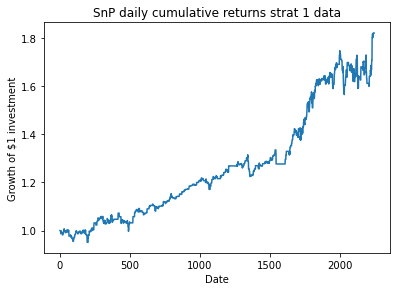

In [83]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
snp_cum_returns_strat1.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("SnP daily cumulative returns strat 1 data")
plt.show()

# Strategy no 2

In [84]:
invested = [0]
indice_pos = 0
indice_neg = 0
for i in range(0,len(merged_dataframe)):
    if merged_dataframe.iloc[i]["Sent_enc"] > 0:
        indice_pos = indice_pos+1
        indice_neg = 0
    elif merged_dataframe.iloc[i]["Sent_enc"] < 0:
        indice_neg=indice_neg+1
        indice_pos = 0
        
    if indice_pos>=3:
        invested.append(1)
        indice_neg = 0
    elif indice_neg>=3 :
        invested.append(0)
        indice_pos = 0
    else :
        invested.append(invested[-1])
    
        


In [85]:
len(invested)

2247

In [86]:
invested = invested[:-1]

In [87]:
len(invested)

2246

In [88]:
merged_dataframe["Invested 2"] = invested

In [89]:
daily_returns_if_invested = []
for i in range(0,len(merged_dataframe)) :
    if merged_dataframe.iloc[i]["Invested 2"] == 1:
        daily_returns_if_invested.append(merged_dataframe.iloc[i]["Daily Returns"])
    else :
        daily_returns_if_invested.append(0)

In [90]:
merged_dataframe["daily_returns_if_invested"] = daily_returns_if_invested

In [91]:
snp_cum_returns_strat2 = (pd.Series(daily_returns_if_invested) + 1).cumprod()


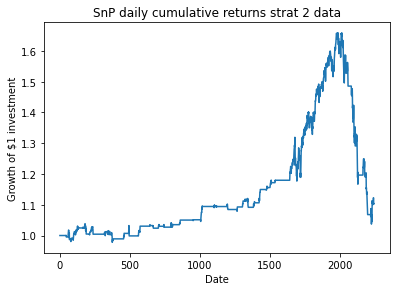

In [92]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
snp_cum_returns_strat2.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("SnP daily cumulative returns strat 2 data")
plt.show()